<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#최신-영화" data-toc-modified-id="최신-영화-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>최신 영화</a></span></li><li><span><a href="#평점이-높은-영화" data-toc-modified-id="평점이-높은-영화-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>평점이 높은 영화</a></span><ul class="toc-item"><li><span><a href="#특정-장르의-평점이-높은-영화" data-toc-modified-id="특정-장르의-평점이-높은-영화-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>특정 장르의 평점이 높은 영화</a></span><ul class="toc-item"><li><span><a href="#공포-영화-중-평점이-높은-영화" data-toc-modified-id="공포-영화-중-평점이-높은-영화-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>공포 영화 중 평점이 높은 영화</a></span></li><li><span><a href="#SF-영화-중-평점이-높은-영화" data-toc-modified-id="SF-영화-중-평점이-높은-영화-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>SF 영화 중 평점이 높은 영화</a></span></li></ul></li><li><span><a href="#최신-영화-중-평점이-높은-영화" data-toc-modified-id="최신-영화-중-평점이-높은-영화-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>최신 영화 중 평점이 높은 영화</a></span></li></ul></li><li><span><a href="#Content-Based-Filtering" data-toc-modified-id="Content-Based-Filtering-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Content-Based Filtering</a></span></li></ul></div>

In [7]:
import requests
from io import BytesIO
from PIL import Image
import os
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
import warnings
import pymysql
from google_drive_downloader import GoogleDriveDownloader as gdd

plt.style.use("dark_background")

warnings.filterwarnings("ignore", category=DeprecationWarning)

In [8]:
# 영화 포스터를 가져와 주피터에서 볼 수 있도록 만들어주는 메소드
def display_posters(movieId_list):
    def get_poster(movieId):
        url = f"https://pai-datasets.s3.ap-northeast-2.amazonaws.com/recommender_systems/movielens/img/POSTER_20M_FULL/{movieId}.jpg"
        try:
            response = requests.get(url)
            b = BytesIO(response.content)
            img = np.asarray(Image.open(b))
        except:
            img = np.zeros((200,100,3))
        return img
    
    images = []
    for i in movieId_list:
        img = get_poster(i)
        images.append(img)

    columns = 5
    rows = (len(movieId_list) - 1) // columns + 1
    fig, axes = plt.subplots(rows, columns)
    axes = axes.flatten()
    fig.set_size_inches((20,rows * 5))
        
    for ind, img in enumerate(images):
        c_id = ind % columns
        r_id = ind // columns
        ax = axes[r_id*columns + c_id]
        ax.set_title(movieId_list[ind])
        ax.imshow(img)

    plt.tight_layout()

In [9]:
gdd.download_file_from_google_drive(file_id="1uPjBuhv96mJP9oFi-KNyVzNkSlS7U2xY", dest_path="./movies.csv")
movies_df = pd.read_csv("movies.csv", index_col=0)

gdd.download_file_from_google_drive(file_id="1hik_RSV0e5r_P3iYe4sK8B-eNWxmIWOa", dest_path="./genres.csv")
genres_df = pd.read_csv("genres.csv", index_col=0)

gdd.download_file_from_google_drive(file_id="15vsm-VWAC3Y-7jr7ROL_xy0ufkIfqSke", dest_path="./ratings.csv")
ratings_df = pd.read_csv("ratings.csv", index_col=0)

C:\Users\00006363\Anaconda3\envs\tf2.0\lib\site-packages\numpy\lib\arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [26]:
movies_df.sample(5)

id                          title  release_year
26972  129701  The Robot vs. the Aztec Mummy          1958
7046     7158          House of Sand and Fog          2003
17955   90066                Road to Nowhere          2010
8487    25927                  Stranger, The          1946
22231  106967               April Fools, The          1969

In [27]:
genres_df.sample(5)

movie_id        genre
41893    100719  Documentary
3128       1586        Drama
41920    100830      Romance
5781       2908        Drama
8898       4548      Western

In [28]:
#rated_at은 언제 rating을 했는지를 알려주는 타임스탬프 값으로, 1970년 1월 1일 0시 0분 0초로부터 몇 초가 지났는지를 나타내는 정수입니다.
ratings_df.sample(5)

user_id  movie_id  rating    rated_at
12648473    87417      2396     5.0   944582055
6925413     47708      1777     4.0  1276943382
12979935    89597       902     4.0  1346796909
14935543   103181      7713     4.0  1282833015
6934456     47790       780     3.0   944135344

In [166]:
#rated_at을 초 단위로 변환합니다.
ratings_df["rated_at"] = pd.to_datetime(ratings_df["rated_at"], unit="s")

In [167]:
ratings_df.sample(5)

user_id  movie_id  rating            rated_at
3265440     22305       616     4.0 2004-11-07 22:16:47
8944563     61825      1303     4.0 2001-01-03 15:33:27
8777033     60653      3793     4.0 2005-05-15 00:36:55
11317069    78176      1198     5.0 1999-10-24 19:17:53
19573026   135477      6807     4.5 2011-04-10 21:53:40

# 최신 영화

In [118]:
print(set(movies_df["release_year"]))

{1891, 1893, 1894, 1895, 1896, 1898, 1899, 1900, 1901, 1902, 1903, 1905, 1909, 1910, 1912, 1913, 1914, 1915, 1916, 1917, 1918, 1919, 1920, 1921, 1922, 1923, 1924, 1925, 1926, 1927, 1928, 1929, 1930, 1931, 1932, 1933, 1934, 1935, 1936, 1937, 1938, 1939, 1940, 1941, 1942, 1943, 1944, 1945, 1946, 1947, 1948, 1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015}


- 1891년~2015년의 영화 데이터가 있습니다. 이중 가장 최신인 2015년의 영화를 뽑습니다.

In [34]:
movies_df[movies_df["release_year"]==2015]

id                                       title  release_year
23865  113345                           Jupiter Ascending          2015
24855  117466                     In the Heart of the Sea          2015
25254  119145                Kingsman: The Secret Service          2015
25460  120466                                     Chappie          2015
25490  120635                                     Taken 3          2015
...       ...                                         ...           ...
27192  131013                                    Get Hard          2015
27194  131017  Aziz Ansari: Live at Madison Square Garden          2015
27195  131019                               The Intruders          2015
27260  131170                                   Parallels          2015
27264  131180                     Dead Rising: Watchtower          2015

[121 rows x 3 columns]

- 2015년에 개봉한 영화는 총 121개가 있으며 이중 다른 데이터와 결합하여 일부를 선별하여 추천할 수 있습니다.

# 평점이 높은 영화
- 충분히 많은 평가가 이루어지지 않은 아이템은 그 평점을 신뢰할 수 없습니다.
- 보통 응답조사를 할 때 300명 이상을 유의미하다고 판단하므로 평점의 개수가 300개 이상인 영화들만 추려냅니다.

In [119]:
gby_size = ratings_df.groupby("movie_id").size()

cnt_over300 = gby_size[gby_size>=300].index

In [120]:
cnt_over300

Int64Index([     1,      2,      3,      4,      5,      6,      7,      8,
                 9,     10,
            ...
            114180, 114935, 115210, 115569, 115617, 116797, 116823, 117176,
            118696, 119141],
           dtype='int64', name='movie_id', length=5726)

- 이중 평균 평점 상위 10개를 뽑습니다.

In [121]:
gby_mean = ratings_df.groupby("movie_id").mean()

top10 = gby_mean[gby_mean.index.isin(cnt_over300)].nlargest(10, ["rating"], keep="all")

In [122]:
top10

user_id    rating
movie_id                        
318       69205.346164  4.446990
858       69043.949680  4.364732
50        69040.079139  4.334372
527       68954.007432  4.310175
1221      69316.919301  4.275641
2019      69140.910516  4.274180
904       68514.834661  4.271334
7502      68693.969570  4.263182
912       69139.277096  4.258327
922       69173.617625  4.256935

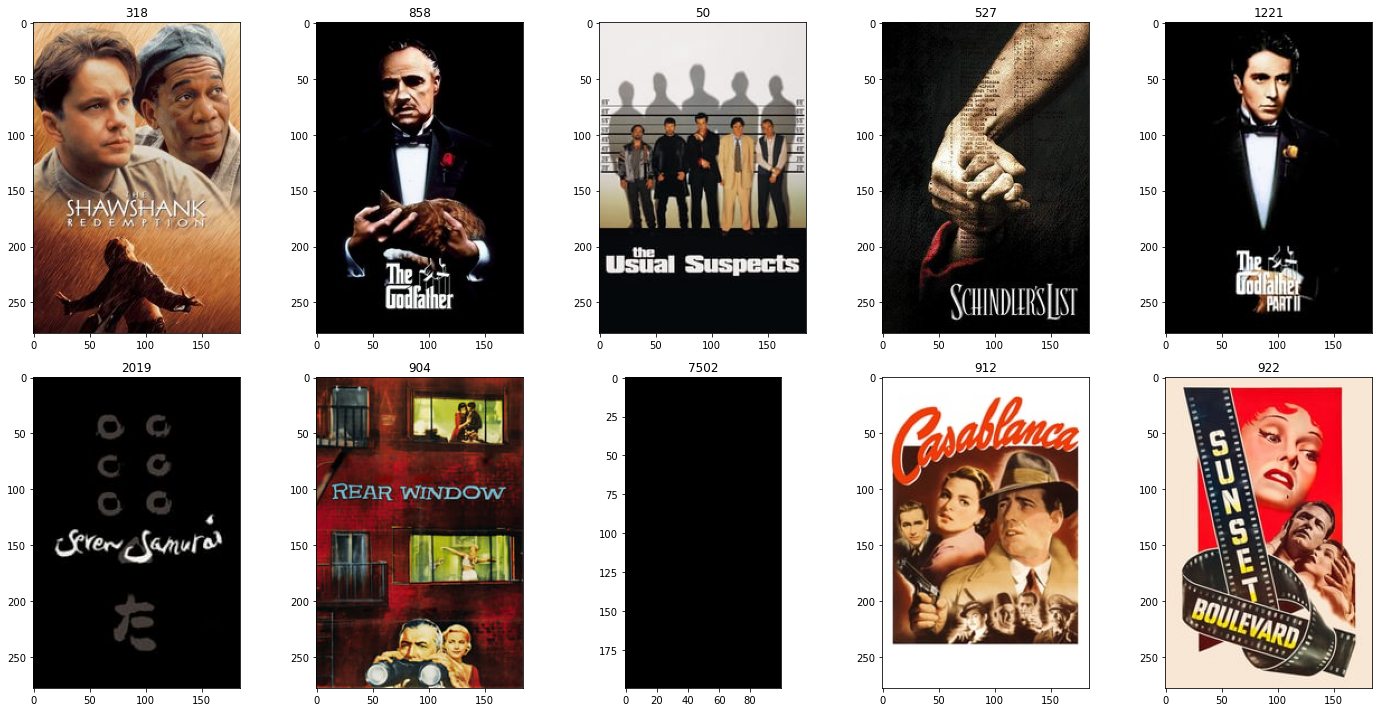

In [123]:
display_posters(top10.index)

## 특정 장르의 평점이 높은 영화

In [140]:
#장르별 영화의 수
gby_genre = genres_df.groupby(["genre"]).count().sort_values(["movie_id"])

In [141]:
gby_genre

movie_id
genre                       
IMAX                     196
(no genres listed)       246
Film-Noir                330
Western                  676
Animation               1027
Musical                 1036
Children                1139
War                     1194
Fantasy                 1412
Mystery                 1514
Sci-Fi                  1743
Adventure               2329
Documentary             2471
Horror                  2611
Crime                   2939
Action                  3520
Romance                 4127
Thriller                4178
Comedy                  8374
Drama                  13344

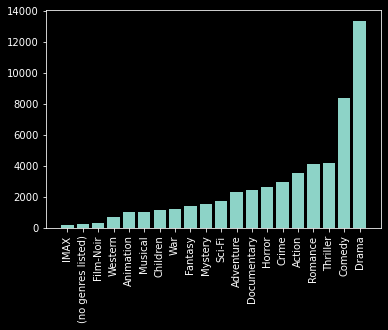

In [142]:
fig, ax = plt.subplots()

ax.bar(x=gby_genre.index, height=gby_genre["movie_id"])

ax.tick_params(axis="x", labelrotation=90)

fig.savefig("hist.png")

### 공포 영화 중 평점이 높은 영화

In [138]:
#공포 영화들의 집합
horrors = set(genres_df[genres_df["genre"]=="Horror"]["movie_id"])
#공포 영화들의 ratings_df
ratings_df_horror = ratings_df[ratings_df["movie_id"].isin(horrors)]
gby_size = ratings_df_horror.groupby("movie_id").size()

cnt_over300_horror = gby_size[gby_size>=300].index

In [139]:
cnt_over300_horror

Int64Index([    12,     22,     70,     92,     93,    152,    177,    183,
               188,    196,
            ...
             86835,  91974,  92422,  93840,  94478,  94864,  95207,  99007,
            103249, 103688],
           dtype='int64', name='movie_id', length=525)

- 이중 평균 평점 상위 10개를 뽑습니다.

In [143]:
gby_mean = ratings_df.groupby("movie_id").mean()

top10_horror = gby_mean[gby_mean.index.isin(cnt_over300_horror)].nlargest(10, ["rating"], keep="all")

In [144]:
top10_horror

user_id    rating
movie_id                        
593       69310.764119  4.177057
1219      69313.736984  4.076900
2762      69094.285923  4.054999
1214      69160.255035  4.041784
1258      69029.722255  4.011534
7116      68859.392586  4.010932
61240     69188.652632  4.010526
1200      68918.004852  4.005642
7505      68474.883234  3.970060
6987      68756.326812  3.912319

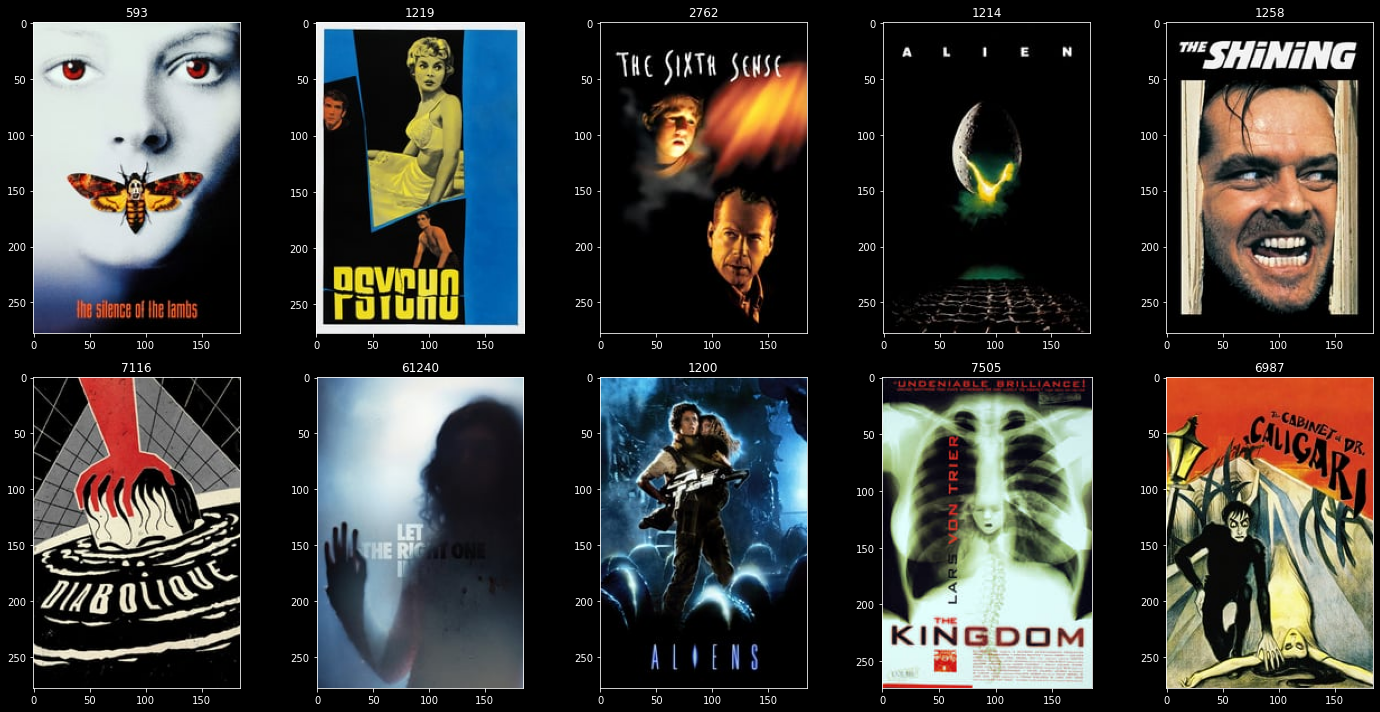

In [145]:
display_posters(top10_horror.index)

### SF 영화 중 평점이 높은 영화

In [146]:
#공포 영화들의 집합
SFs = set(genres_df[genres_df["genre"]=="Sci-Fi"]["movie_id"])
#공포 영화들의 ratings_df
ratings_df_SF = ratings_df[ratings_df["movie_id"].isin(SFs)]
gby_size = ratings_df_SF.groupby("movie_id").size()

cnt_over300_SF = gby_size[gby_size>=300].index

In [147]:
cnt_over300_SF

Int64Index([    24,     29,     32,     66,     76,    103,    160,    172,
               173,    196,
            ...
            110730, 111360, 111362, 111364, 111759, 112623, 112852, 114180,
            114935, 116823],
           dtype='int64', name='movie_id', length=612)

- 이중 평균 평점 상위 10개를 뽑습니다.

In [148]:
gby_mean = ratings_df.groupby("movie_id").mean()

top10_SF = gby_mean[gby_mean.index.isin(cnt_over300_SF)].nlargest(10, ["rating"], keep="all")

In [149]:
top10_SF

user_id    rating
movie_id                        
260       69135.754523  4.190672
1196      69134.266458  4.188202
2571      69092.710504  4.187186
94466     65649.584192  4.182990
79132     69196.991942  4.156172
541       69071.248444  4.133706
7361      68771.053865  4.105628
7099      68685.979604  4.092082
66934     67048.690476  4.068372
1223      69169.727670  4.066765

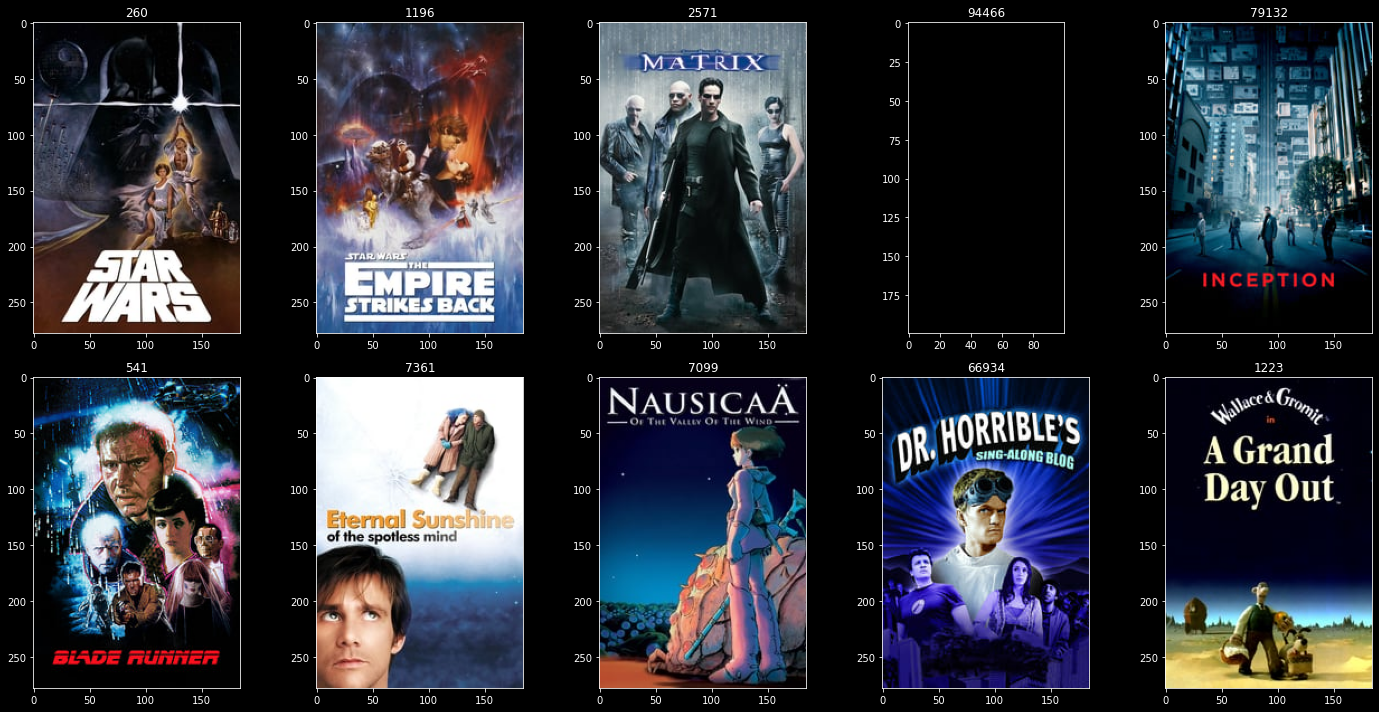

In [150]:
display_posters(top10_SF.index)

## 최신 영화 중 평점이 높은 영화

In [161]:
recent_yr = movies_df["release_year"].max()
#recent_year 기준 최근 3개 년도의 영화만 선별합니다.
recent_movies = set(movies_df[movies_df["release_year"].isin([recent_yr, recent_yr-1, recent_yr-2])]["id"])
#평점이 300개 이상인 영화들의 집합을 만듭니다.
gby_size = ratings_df.groupby("movie_id").size()
cnt_over300 = set(gby_size[gby_size>=300].index)

#최신 영화 중 평점이 300개 이상인 영화들의 ratings_df
ratings_df_recent = ratings_df[ratings_df["movie_id"].isin((recent_movies) & (cnt_over300))]

In [163]:
gby_mean = ratings_df_recent.groupby("movie_id").mean()

top10_recent = gby_mean[gby_mean.index.isin(set(recent_movies) & set(cnt_over300))].nlargest(10, ["rating"], keep="all")

In [164]:
top10_recent

user_id    rating
movie_id                        
112552    68679.205980  4.074751
109487    70066.872340  4.023864
109374    69073.127354  3.992152
116797    69652.001318  3.980237
112556    71115.344151  3.936444
104879    67974.037989  3.921229
104913    68854.044444  3.917284
106642    67211.275779  3.917266
104374    68511.888736  3.916209
106920    69435.902778  3.901944

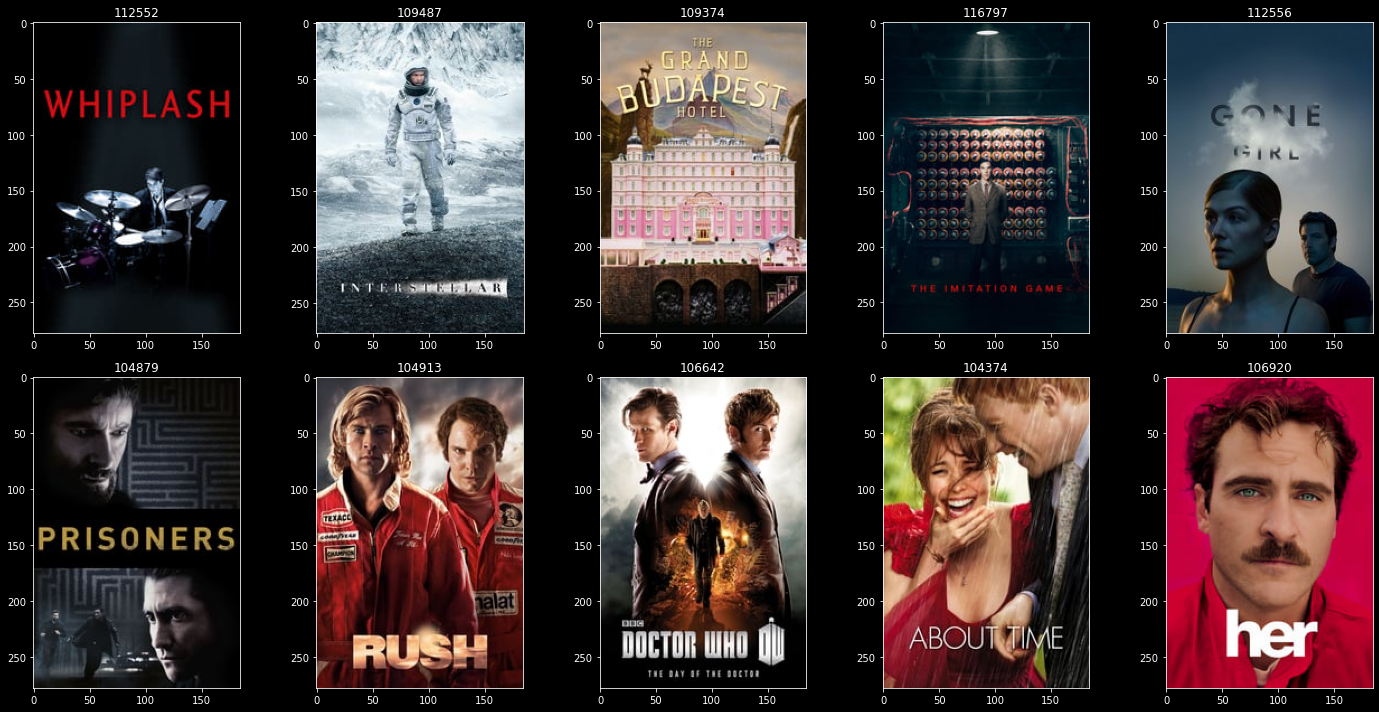

In [165]:
display_posters(top10_recent.index)

# Content-Based Filtering

In [10]:
#id:title의 dictionary를 만듭니다.
id2title = dict(zip(movies_df["id"], movies_df["title"]))

ratings_df["title"] = ratings_df["movie_id"].map(id2title)

In [13]:
ratings_df

user_id  movie_id  rating    rated_at  \
0               1         2     3.5  1112486027   
1               1        29     3.5  1112484676   
2               1        32     3.5  1112484819   
3               1        47     3.5  1112484727   
4               1        50     3.5  1112484580   
...           ...       ...     ...         ...   
20000258   138493     68954     4.5  1258126920   
20000259   138493     69526     4.5  1259865108   
20000260   138493     69644     3.0  1260209457   
20000261   138493     70286     5.0  1258126944   
20000262   138493     71619     2.5  1255811136   

                                                      title  
0                                                   Jumanji  
1         City of Lost Children, The (Cité des enfants p...  
2                        Twelve Monkeys (a.k.a. 12 Monkeys)  
3                                      Seven (a.k.a. Se7en)  
4                                       Usual Suspects, The  
...                                                     ...  
20000258                                                 Up  
20000259                Transformers: Revenge of the Fallen  
20000260                     Ice Age: Dawn of the Dinosaurs  
20000261                                         District 9  
20000262             Coco Before Chanel (Coco avant Chanel)  

[20000263 rows x 5 columns]

In [14]:
#One Day의 movie_id를 가져옵니다.
oneday_id = movies_df[movies_df["title"]=="One Day"]["id"].values[0]

In [15]:
oneday_id

88179

In [16]:
#영화별 장르의 집합을 만듭니다.
genres_set = genres_df.groupby(["movie_id"])["genre"].apply(set)

In [39]:
genres_set.sample(5)

movie_id
122058           {Comedy, Musical, Romance}
90243                       {Drama, Action}
3614                      {Comedy, Romance}
2343                                {Drama}
56069     {Horror, Comedy, Thriller, Drama}
Name: genre, dtype: object

In [40]:
#One Day의 장르를 가져옵니다.
oneday_genre = genres_set[oneday_id]

In [19]:
oneday_genre

{'Drama', 'Romance'}

In [22]:
#One Day와 장르가 동일한 영화를 뽑습니다.
same_genre = genres_set[genres_set==oneday_genre].index

In [23]:
same_genre

Int64Index([    17,     25,     28,     35,     46,     49,     74,     83,
                85,    105,
            ...
            128688, 129032, 129788, 129841, 129857, 129947, 130388, 130396,
            130746, 131162],
           dtype='int64', name='movie_id', length=1075)

In [41]:
#평점을 4점 이상 준 영화를 좋아한다고 판단하겠습니다.
likes_df = ratings_df[ratings_df["rating"]>=4.0]

#영화별로 해당 영화를 좋아하는 사람의 수를 뽑습니다.
n_likes = likes_df.groupby(["movie_id"]).size()

In [42]:
n_likes

movie_id
1         33294
2          7272
3          4015
4           694
5          3288
          ...  
131250        1
131252        1
131254        1
131256        1
131262        1
Length: 20720, dtype: int64

In [43]:
#One Day와 동일한 장르의 영화들 중 가장 많은 사람들이 좋아하는 상위 10개입니다.
same_genre_top10 = n_likes[n_likes.index.isin(same_genre)].iloc[:10].index

[id2title[id] for id in same_genre_top10]

['Sense and Sensibility',
 'Leaving Las Vegas',
 'Persuasion',
 'Carrington',
 'How to Make an American Quilt',
 'When Night Is Falling',
 'Bed of Roses',
 'Once Upon a Time... When We Were Colored',
 'Angels and Insects',
 'Bridges of Madison County, The']